(2, 6) (5, 5)


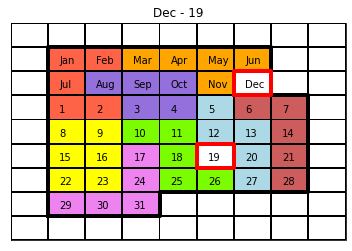

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

date_label = 'Dec-19'
month, day = date_label.split('-')

sol = {'A': {(1, 2), (2, 1), (3, 1), (1, 1), (3, 2)}, 'B': {(6, 2), (6, 1), (5, 1), (4, 2), (4, 1), (5, 2)}, 'C': {(4, 4), (6, 5), (4, 3), (5, 4), (6, 4)}, 'D': {(4, 6), (4, 5), (5, 6), (6, 6), (3, 5)}, 'E': {(3, 7), (5, 7), (6, 7), (3, 6), (4, 7)}, 'F': {(7, 1), (7, 3), (7, 2), (5, 3), (6, 3)}, 'G': {(2, 4), (3, 4), (2, 3), (3, 3), (2, 2)}, 'H': {(1, 5), (1, 4), (1, 6), (2, 5), (1, 3)}}

grid = np.zeros((9, 9))

grid[:, :] = 0
x, y, z = list(), list(), list()
value = 50
for k, v in sorted(sol.items()):
    for r, c in v:
        grid[r, c] = value
    value += 50

text_conversion = dict()
points = set(product(range(1,9), range(1,9)))
for p in points:
    text_conversion[p] = ''


month_conversion = {
    (1, 1): "Jan",
    (1, 2): "Feb",
    (1, 3): "Mar",
    (1, 4): "Apr",
    (1, 5): "May",
    (1, 6): "Jun",
    (2, 1): "Jul",
    (2, 2): "Aug",
    (2, 3): "Sep",
    (2, 4): "Oct",
    (2, 5): "Nov",
    (2, 6): "Dec",
}
for coords, month in month_conversion.items():
    text_conversion[coords] = month

count = 1
for r in range(3, 8):
    for c in range(1, 8):
        if count < 32:
            text_conversion[(r, c)] = str(count)
        count += 1


month_cell = list(text_conversion.keys())[list(text_conversion.values()).index(month)]
day_cell = list(text_conversion.keys())[list(text_conversion.values()).index(day)]
print(month_cell, day_cell)
r,c = month_cell
contour_month_x = [c,c,c+1,c+1,c]
contour_month_y = [8-r, 8-r+1, 8-r+1, 8-r, 8-r]
r,c = day_cell
contour_day_x = [c,c,c+1,c+1,c]
contour_day_y = [8-r, 8-r+1, 8-r+1, 8-r, 8-r]

grid = np.flipud(grid)

fig, ax = plt.subplots()
#ax.pcolormesh(grid, cmap=plt.cm.get_cmap('Set1', 9), edgecolors="k", linewidths=1)
# cmap = {500:'white', 50:'red', 100:'yellow', 150:'green', 200:'blue', 250:'brown', 300:'pink', 350:'brown', 400:'magenta'}
from matplotlib import colors
cmap = colors.ListedColormap(['white','tomato','yellow','lawngreen','lightblue','indianred', 'violet', 'mediumpurple', 'orange'])

ax.pcolormesh(grid, cmap=cmap, edgecolors="k", linewidths=1)

for r,c in text_conversion.keys():
    ax.text(r+0.3, 8-c+0.3, text_conversion[(c,r)])

contour_x = [1,1,7,7,8,8,4,4,1]
contour_y = [1,8,8,6,6,2,2,1,1]
ax.plot(contour_x, contour_y,c='black', linewidth=4)
ax.plot(contour_month_x, contour_month_y,c='red', linewidth=4)
ax.plot(contour_day_x, contour_day_y,c='red', linewidth=4)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title(f'{month} - {day}')
plt.show()
